In [ ]:
!pip install datasets pandas
!pip install seaborn
from datasets import load_dataset
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import re

# Load the dataset
ds = load_dataset("bigcode/bigcodebench-results")
df = ds['train'].to_pandas()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 11.2 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/987 [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/160 [00:00<?, ? examples/s]

In [ ]:
instruct_models = df[df['model'].str.contains('instruct', case=False, regex=True)]

# Print the number of instruct models found
print(f"Number of instruct models: {len(instruct_models)}")

Number of instruct models: 53


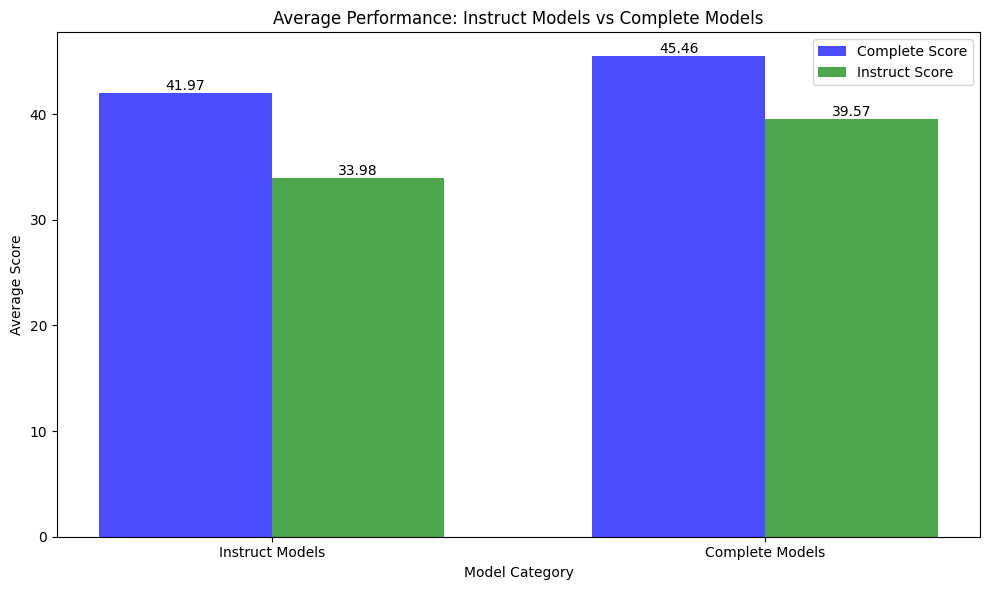


Detailed Statistics:

Number of Instruct Models: 53
Number of Complete Models: 107

Average Scores for Instruct Models:
complete    41.967391
instruct    33.984444
dtype: float64

Average Scores for Complete Models:
complete    45.460000
instruct    39.570312
dtype: float64

Standard Deviations for Instruct Models:
complete    11.114596
instruct     9.562449
dtype: float64

Standard Deviations for Complete Models:
complete    10.518852
instruct     6.444653
dtype: float64


In [ ]:
# Identify instruct models using regex
instruct_mask = df['model'].str.contains('instruct', case=False, regex=True)

# Calculate averages for both groups
instruct_models = df[instruct_mask][['complete', 'instruct']].mean()
complete_models = df[~instruct_mask][['complete', 'instruct']].mean()

# Prepare data for plotting
categories = ['Instruct Models', 'Complete Models']
complete_scores = [instruct_models['complete'], complete_models['complete']]
instruct_scores = [instruct_models['instruct'], complete_models['instruct']]

# Create bar plot
plt.figure(figsize=(10, 6))
bar_width = 0.35
index = np.arange(len(categories))

# Create bars
plt.bar(index - bar_width/2, complete_scores, bar_width,
        label='Complete Score', color='blue', alpha=0.7)
plt.bar(index + bar_width/2, instruct_scores, bar_width,
        label='Instruct Score', color='green', alpha=0.7)

# Customize plot
plt.xlabel('Model Category')
plt.ylabel('Average Score')
plt.title('Average Performance: Instruct Models vs Complete Models')
plt.xticks(index, categories)
plt.legend()

# Add value labels
for i in index:
    plt.text(i - bar_width/2, complete_scores[i],
             f'{complete_scores[i]:.2f}',
             ha='center', va='bottom')
    plt.text(i + bar_width/2, instruct_scores[i],
             f'{instruct_scores[i]:.2f}',
             ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Print detailed statistics
print("\nDetailed Statistics:")
print(f"\nNumber of Instruct Models: {instruct_mask.sum()}")
print(f"Number of Complete Models: {(~instruct_mask).sum()}")

print("\nAverage Scores for Instruct Models:")
print(instruct_models)

print("\nAverage Scores for Complete Models:")
print(complete_models)

# Calculate and print standard deviations
print("\nStandard Deviations for Instruct Models:")
print(df[instruct_mask][['complete', 'instruct']].std())

print("\nStandard Deviations for Complete Models:")
print(df[~instruct_mask][['complete', 'instruct']].std())

# Calulating the average only gives a general look at the scores but it's not really significant, let's now try to compare instruct and base versions for the same model on both datasets : Complete and instruct

the difference between instruct and complete data sets as defined on the benchmark description :

    Complete: Code Completion based on the (verbose) structured docstring. This split tests if the models are good at coding.
    Instruct (🔥Vibe Check🔥): Code Generation based on the (less verbose) NL-oriented instructions. This split tests if the models are really capable enough to understand human intents to code.
I tried to go more in depth and compare a few problems from each dataSet, you can fin the results in the report Document https://docs.google.com/document/d/1qSN_O10LwCRS6gQjPKk1ciH8dEk0bev1DHbfxAQ5gGE/edit?usp=sharing .

this won't really affect the experience as the main focus will be on comparing complete scores on both instruct tuned and base versions of a model.

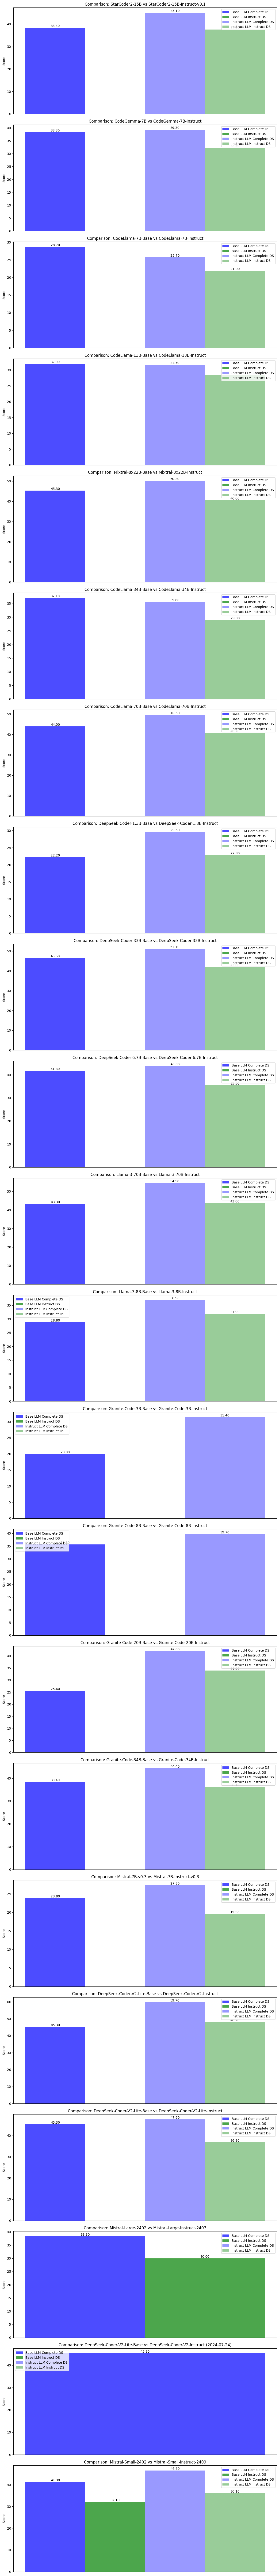


Detailed Statistics for Each Pair:

Base Model: StarCoder2-15B
Instruct Model: StarCoder2-15B-Instruct-v0.1
Base Complete: 38.40
Base Instruct: nan
Instruct Complete: 45.10
Instruct Instruct: 37.60
--------------------------------------------------

Base Model: CodeGemma-7B
Instruct Model: CodeGemma-7B-Instruct
Base Complete: 38.30
Base Instruct: nan
Instruct Complete: 39.30
Instruct Instruct: 32.30
--------------------------------------------------

Base Model: CodeLlama-7B-Base
Instruct Model: CodeLlama-7B-Instruct
Base Complete: 28.70
Base Instruct: nan
Instruct Complete: 25.70
Instruct Instruct: 21.90
--------------------------------------------------

Base Model: CodeLlama-13B-Base
Instruct Model: CodeLlama-13B-Instruct
Base Complete: 32.00
Base Instruct: nan
Instruct Complete: 31.70
Instruct Instruct: 28.50
--------------------------------------------------

Base Model: Mixtral-8x22B-Base
Instruct Model: Mixtral-8x22B-Instruct
Base Complete: 45.30
Base Instruct: nan
Instruct Com

In [ ]:
# Find instruct models
instruct_models = df[df['model'].str.contains('instruct', case=False, regex=True)]

# Function to find base model name from instruct model name
def get_base_name(model_name):
    # Remove 'instruct' and any following characters
    base_name = re.split('[-_]?instruct', model_name, flags=re.IGNORECASE)[0]
    return base_name

# Find matching pairs
pairs = []
for _, instruct_row in instruct_models.iterrows():
    base_name = get_base_name(instruct_row['model'])
    # Find matching base model
    base_model = df[df['model'].str.contains(f'^{re.escape(base_name)}(?!.*instruct)',
                                           case=False, regex=True)]

    if not base_model.empty:
        pairs.append({
            'instruct_model': instruct_row['model'],
            'base_model': base_model.iloc[0]['model'],
            'instruct_complete': instruct_row['complete'],
            'instruct_instruct': instruct_row['instruct'],
            'base_complete': base_model.iloc[0]['complete'],
            'base_instruct': base_model.iloc[0]['instruct']
        })

# Create plot for each pair
if pairs:
    # Plot settings
    num_pairs = len(pairs)
    fig, axs = plt.subplots(num_pairs, 1, figsize=(12, 5*num_pairs))
    if num_pairs == 1:
        axs = [axs]

    bar_width = 0.2
    index = np.array([0, 1])

    for i, pair in enumerate(pairs):
        # Create four bars for each pair
        axs[i].bar(index[0] - bar_width*1.5, pair['base_complete'], bar_width,
                  label='Base LLM Complete DS', color='blue', alpha=0.7)
        axs[i].bar(index[0] - bar_width/2, pair['base_instruct'], bar_width,
                  label='Base LLM Instruct DS', color='green', alpha=0.7)
        axs[i].bar(index[0] + bar_width/2, pair['instruct_complete'], bar_width,
                  label='Instruct LLM Complete DS', color='blue', alpha=0.4)
        axs[i].bar(index[0] + bar_width*1.5, pair['instruct_instruct'], bar_width,
                  label='Instruct LLM Instruct DS', color='green', alpha=0.4)
        # Customize subplot
        axs[i].set_title(f"Comparison: {pair['base_model']} vs {pair['instruct_model']}")
        axs[i].set_xticks([])
        axs[i].set_ylabel('Score')
        axs[i].legend()

        # Add value labels
        positions = [index[0] - bar_width*1.5, index[0] - bar_width/2,
                    index[0] + bar_width/2, index[0] + bar_width*1.5]
        values = [pair['base_complete'], pair['base_instruct'],
                 pair['instruct_complete'], pair['instruct_instruct']]

        for pos, val in zip(positions, values):
            axs[i].text(pos, val, f'{val:.2f}', ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

    # Print detailed statistics
    print("\nDetailed Statistics for Each Pair:")
    for pair in pairs:
        print(f"\nBase Model: {pair['base_model']}")
        print(f"Instruct Model: {pair['instruct_model']}")
        print(f"Base Complete: {pair['base_complete']:.2f}")
        print(f"Base Instruct: {pair['base_instruct']:.2f}")
        print(f"Instruct Complete: {pair['instruct_complete']:.2f}")
        print(f"Instruct Instruct: {pair['instruct_instruct']:.2f}")
        print("-" * 50)
else:
    print("No matching pairs found.")